## 1. heatmap - passing count and passed count 
## 2. heatmap - passing positions vs passing quarter (time)

### import all racing data from 2015 to 2019

In [1]:
import pandas as pd
import os
import glob

path = '/Users/Zheng/Desktop/Zhao Yongyi - 104A HW/race_data/all_races_15to19'
extension = 'xlsx'
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]

a = {elm:pd.ExcelFile(elm) for elm in result}

file_storage = [] # a list to store all files
file_names = list(a.keys()) # a list of file names
for i in range(len(file_names)):
    file_storage.append(pd.read_excel(file_names[i]).drop('Pos', axis = 1).transpose())

### define helper function

In [2]:
# help functions (辅助函数)
# 1. 
def lap_to_quarter(fraction):
    if fraction<=0.25:
        return 1
    if (fraction>0.25) & (fraction<=0.5):
        return 2
    if (fraction>0.5) & (fraction<=0.75):
        return 3
    if (fraction>0.75) & (fraction<=1):
        return 4

# 2.
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

### track rider position, passing position, passing time & being passed position...

In [4]:
# predator
k = len(file_storage) # 80 files in total
position_list = [] # store Rossi's all position
passing_position_list = [] # store all his passing positions
passing_time_list = [] # store all his passing time
pair_list = []  # a pair of passing position vs time
passing_count_list = [] # a list of counting the total number of passing for each race 

rider_number = 46 # try a single rider first, then try to generalize

passed_position_track = [] # for prey
passed_time_track = [] # for prey
passed_count_list = [] # for prey

for i in range(k):
    df = file_storage[i]
    total_laps = df.shape[1]
    position_track = []
    for j in range(total_laps):
        if rider_number in list(df[j]): # check if the rider has already fell off
            position_track.append(list(df[j]).index(rider_number)+1)
    
    passing_position_track = [] # passing position track
    passing_time_track = [] # passing time track
    
    # predator
    for l in range(len(position_track)-1):
        fraction = l/total_laps
        if position_track[l] > position_track[l+1]:
            passing_position_track.append(position_track[l])
            passing_time_track.append(lap_to_quarter(fraction))
    position_list = position_list + position_track
    passing_position_list = passing_position_list + passing_position_track
    passing_time_list = passing_time_list + passing_time_track
    pair_list = merge(passing_position_list, passing_time_list)
    
    passing_count_list.append(len(passing_position_track)) # count the number of passing in a race
    
    passed_position_track = []
    passed_time_track = []
    
    # prey
    for l in range(len(position_track)-1):
        fraction = l/total_laps
        if position_track[l] < position_track[l+1]:
            passed_position_track.append(position_track[l])
            passed_time_track.append(lap_to_quarter(fraction))
    passed_count_list.append(len(passed_position_track))

### display position_count from 2015 to 2019

In [38]:
df = pd.DataFrame(position_list)
df.columns = ['passing_position']
df = df.groupby('passing_position').size().reset_index(name='counts')
df.sort_values(by=['counts'], ascending = False).head()

,passing_position,counts
2,3,406
1,2,338
3,4,296
0,1,209
4,5,147


In [21]:
# single rider test

import matplotlib.pyplot as plt
import numpy as np=

# count of elements in order.
import collections
counter=collections.Counter(position_list)
print(counter.most_common())

[(3, 406), (2, 338), (4, 296), (1, 209), (5, 147), (6, 112), (8, 109), (9, 89), (7, 80), (10, 33), (11, 20), (12, 12), (13, 11), (18, 6), (19, 5), (14, 4), (15, 3), (16, 3), (21, 2), (26, 1), (17, 1), (22, 1)]


### draw a density map (passing time vs passing position)

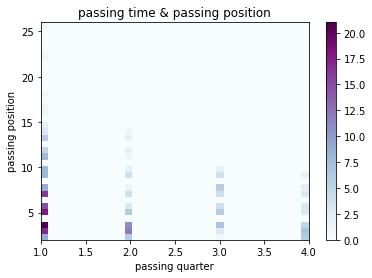

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist2d(passing_time_list, passing_position_list, bins=(35, 35), cmap=plt.cm.BuPu)
plt.colorbar()
plt.title('passing time & passing position')
plt.xlabel('passing quarter')
plt.ylabel('passing position')
plt.show()

### display predator vs prey count

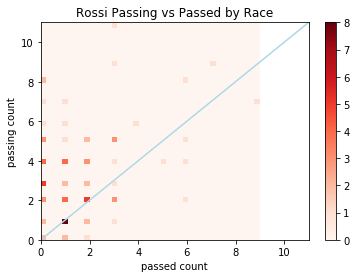

In [204]:
# visualization 3
import matplotlib.pyplot as plt
import numpy, scipy, pylab, random
import numpy as np

axis_range = max(max(passed_count_list), max(passing_count_list))
plt.plot(list(range(axis_range+1)), color = 'lightblue')
plt.hist2d(passed_count_list, passing_count_list , bins=(40, 40), cmap=plt.cm.Reds)
plt.colorbar()
# add y = x to plot
x = np.linspace(0,axis_range,1)
y = x
pylab.xlim([0,axis_range])
pylab.ylim([0,axis_range])
plt.xlabel('passed count')
plt.ylabel('passing count')
plt.title("Rossi Passing vs Passed by Race")
plt.show()

### Repeat the same procedure on another rider

In [221]:
# predator
k = len(file_storage) # 80 files in total
position_list = [] # store Rossi's all position
passing_position_list = [] # store all his passing positions
passing_time_list = [] # store all his passing time
pair_list = []  # a pair of passing position vs time
passing_count_list = [] # a list of counting the total number of passing for each race 

rider_number = 44 # try a single rider first, then try to generalize

passed_position_track = [] # for prey
passed_time_track = [] # for prey
passed_count_list = [] # for prey

for i in range(k):
    df = file_storage[i]
    total_laps = df.shape[1]
    position_track = []
    for j in range(total_laps):
        if rider_number in list(df[j]): # check if the rider has already fell off
            position_track.append(list(df[j]).index(rider_number)+1)
    
    passing_position_track = [] # passing position track
    passing_time_track = [] # passing time track
    
    # predator
    for l in range(len(position_track)-1):
        fraction = l/total_laps
        if position_track[l] > position_track[l+1]:
            passing_position_track.append(position_track[l])
            passing_time_track.append(lap_to_quarter(fraction))
    position_list = position_list + position_track
    passing_position_list = passing_position_list + passing_position_track
    passing_time_list = passing_time_list + passing_time_track
    pair_list = merge(passing_position_list, passing_time_list)
    
    passing_count_list.append(len(passing_position_track)) # count the number of passing in a race
    
    passed_position_track = []
    passed_time_track = []
    
    # prey
    for l in range(len(position_track)-1):
        fraction = l/total_laps
        if position_track[l] < position_track[l+1]:
            passed_position_track.append(position_track[l])
            passed_time_track.append(lap_to_quarter(fraction))
    passed_count_list.append(len(passed_position_track))

In [41]:

# count of elements in order.
import collections
counter=collections.Counter(position_list)
print(counter.most_common())

[(3, 406), (2, 338), (4, 296), (1, 209), (5, 147), (6, 112), (8, 109), (9, 89), (7, 80), (10, 33), (11, 20), (12, 12), (13, 11), (18, 6), (19, 5), (14, 4), (15, 3), (16, 3), (21, 2), (26, 1), (17, 1), (22, 1)]


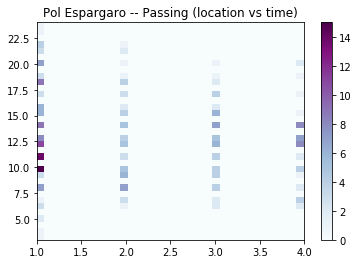

In [231]:
# visualization 2
import matplotlib.pyplot as plt
import numpy as np

plt.hist2d(passing_time_list, passing_position_list, bins=(35, 35), cmap=plt.cm.BuPu)
plt.colorbar()
plt.title("Pol Espargaro -- Passing (location vs time)")
plt.show()

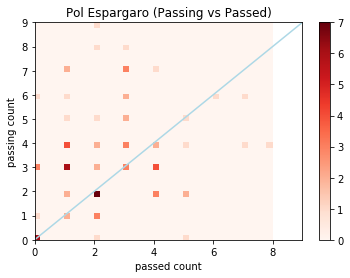

In [227]:
# visualization 2
import matplotlib.pyplot as plt
import numpy, scipy, pylab, random
import numpy as np

axis_range = max(max(passed_count_list), max(passing_count_list))
plt.plot(list(range(axis_range+1)), color = 'lightblue')
plt.hist2d(passed_count_list, passing_count_list , bins=(40, 40), cmap=plt.cm.Reds)
plt.colorbar()
# add y = x to plot
x = np.linspace(0,axis_range,1)
y = x
pylab.xlim([0,axis_range])
pylab.ylim([0,axis_range])
plt.xlabel('passed count')
plt.ylabel('passing count')
plt.title("Pol Espargaro (Passing vs Passed)") # each dot represent the passing count vs passed count in a race
plt.show()